In this notebook we reproduce the visualization from the article We Have A New Prime Number, And It’s 23 Million Digits Long. The visualization shows how the lenght in digits of the largest know primes has grown in the last 400 years. 

We scraped the data from https://www.mersenne.org/primes/ by running the script scrapper_mersenned_primes.py. This visualization is based on this tutorial https://www.dataquest.io/blog/making-538-plots/.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Figures inline and set visualization style
%matplotlib inline

When we run the script scrapper_mersenned_primes.py, it saves the dataset as a csv file in folder data/ which we we load for our visualization.

In [2]:
df = pd.read_csv("data/prime.csv")

We check the contents of the data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
#                    50 non-null int64
2                    50 non-null int64
Digits               50 non-null object
Date Discovered      50 non-null object
Discovered By        50 non-null object
Method / Hardware    46 non-null object
Perfect Number       50 non-null int64
dtypes: int64(3), object(4)
memory usage: 2.8+ KB


The data set contains the following columns:
    
* **#** - row number
* **2** - prime number (2^p-1)
* **Digits** - number of digits of the prime number
* **Date Discovered**
* **Discovered by**
* **Method / Hardware**
* **Perfect Number**

The columns we'll be using in our visualization are Digits and Date Discovered.

In [4]:
#We drop the columns we wont be using
df.drop(['#','2','Discovered By','Method / Hardware','Perfect Number'], axis=1,inplace=True)

In [5]:
#We rename the columns
df.rename(columns={'Date Discovered': 'DateDisc'}, inplace=True)

In [6]:
#We have a look at our data set
df.head()

Digits    DateDisc
0      1  c. 500 BCE
1      1  c. 500 BCE
2      2  c. 275 BCE
3      3  c. 275 BCE
4      4        1456

The column DateDisc has different date formats. We investigate further the different formats so we can fix them.

In [7]:
df['DateDisc'].value_counts()[:10]

c. 275 BCE     2
1952 Jan 30    2
1961 Nov 03    2
c. 500 BCE     2
1588           2
2006 Sep 04    1
2004 May 15    1
1911 Jun       1
1963 Jun 02    1
1979 Feb 09    1
Name: DateDisc, dtype: int64

We are interested in the prime numbers discovered from 1588 onwards. First, we extract the Year from DateDisc column:

In [8]:
df['Year'] = df['DateDisc'].str.extract('(\d\d\d\d)')

In [9]:
df.drop(['DateDisc'], axis=1,inplace=True)

In [10]:
df.head(n=10)

Digits  Year
0      1   NaN
1      1   NaN
2      2   NaN
3      3   NaN
4      4  1456
5      6  1588
6      6  1588
7     10  1772
8     19  1883
9     27  1911

Now, we remove years before 1588 and keep the second record we have from this year.

In [11]:
df = df.loc[6:,:]

In [12]:
df = df.reset_index(drop=True)

Since some observations in Digits column contain ',' we need to remove this before casting to int. 

In [14]:
df['Digits'] = df['Digits'].str.replace(',','')
df['Digits']=pd.to_numeric(df["Digits"])

Pandas does not accept datetime objects that are from 1588 and so we'll have to find a way around it.

In [15]:
df.tail()

Digits  Year
39  12837064  2009
40  12978189  2008
41  17425170  2013
42  22338618  2016
43  23249425  2017

In [16]:
df.set_index('Year',inplace=True)

We plot our data.

Text(0, 0.5, 'Length in digits (log scale)')

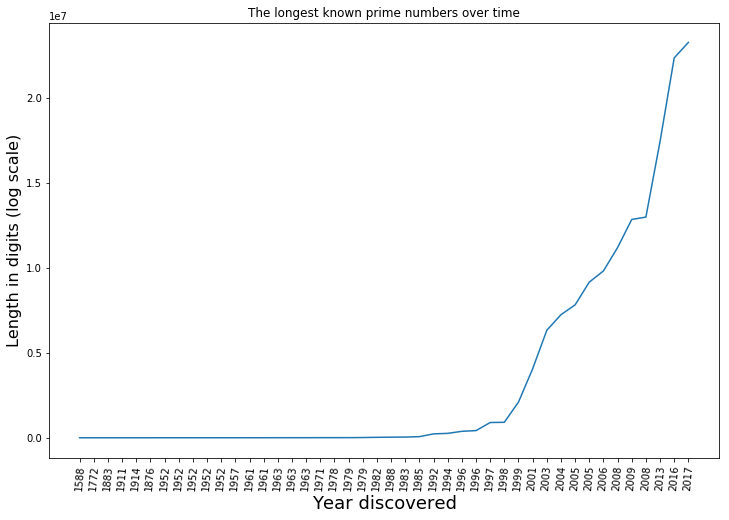

In [20]:
plt.figure(figsize=(12,8))
plt.title('The longest known prime numbers over time')

df['Digits'].plot(kind = 'line', figsize = (12,8))

plt.xticks(np.arange(len(df.index)), df.index);
plt.xticks(rotation=85);
plt.xlabel('Year discovered', fontsize=18)
plt.ylabel('Length in digits (log scale)', fontsize=16)

In [21]:
import matplotlib.style as style
style.use('fivethirtyeight')

Now we use the fiverthiryeight style.

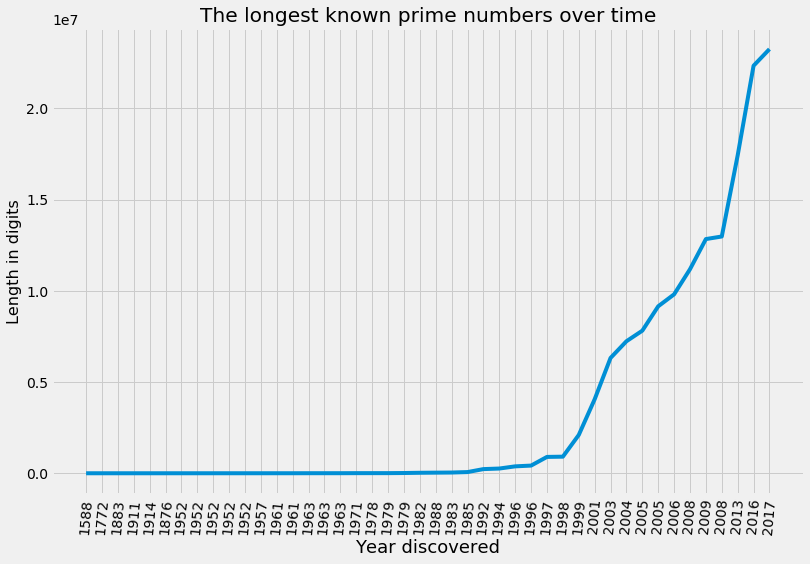

In [28]:
plt.figure(figsize=(12,8))
plt.title('The longest known prime numbers over time')

g = df['Digits'].plot(kind = 'line', figsize = (12,8))

plt.xticks(np.arange(len(df.index)), df.index);
plt.xticks(rotation=85);
plt.xlabel('Year discovered', fontsize=18);
plt.ylabel('Length in digits', fontsize=16);
